# Diamond Price Prediction

https://www.kaggle.com/shivam2503/diamonds

price price in US dollars ($326--$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn

In [34]:
data = pd.read_csv('diamonds.csv', index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
data.reset_index(inplace=True, drop=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
data.shape

(53940, 10)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [13]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [14]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [15]:
data['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

<Axes: title={'center': 'price'}, xlabel='cut'>

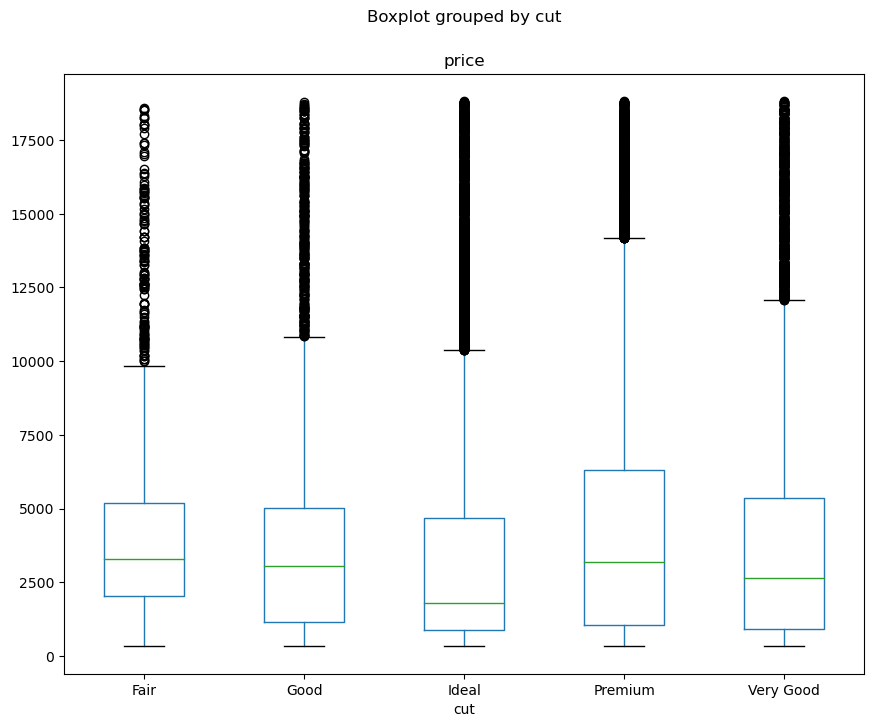

In [16]:
data.boxplot(by = 'cut', column=['price'], grid = False, figsize=(10, 8))

<Axes: title={'center': 'price'}, xlabel='color'>

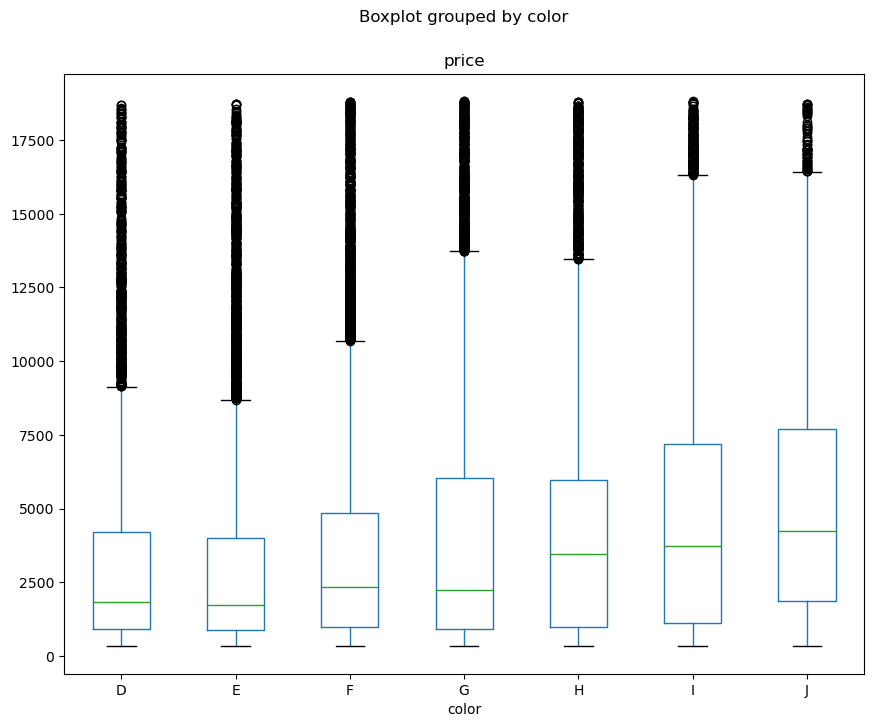

In [17]:
data.boxplot(by = 'color', column=['price'], grid = False, figsize=(10, 8))

<Axes: title={'center': 'price'}, xlabel='clarity'>

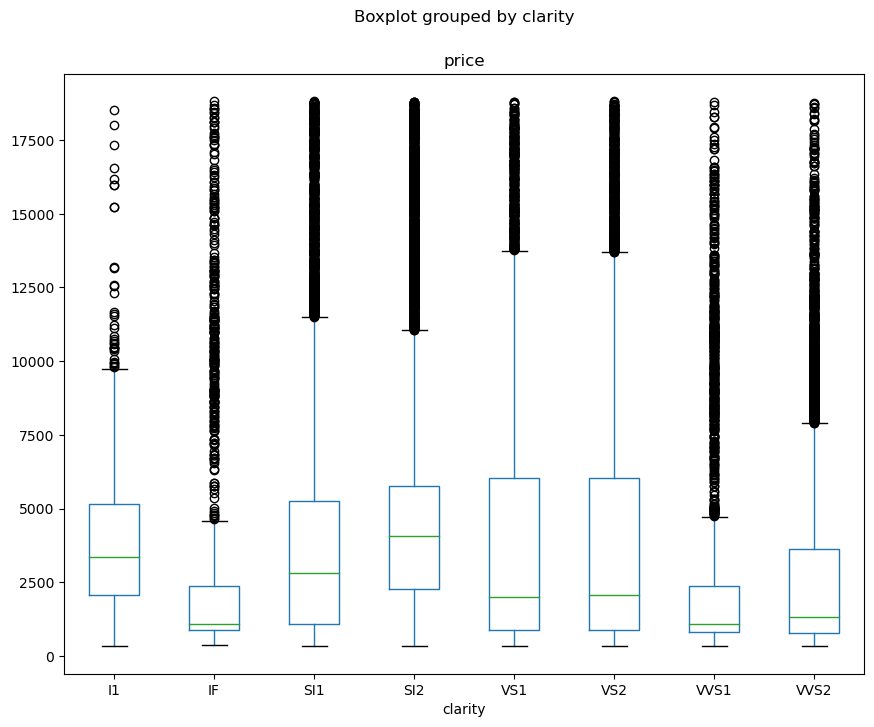

In [18]:
data.boxplot(by = 'clarity', column=['price'], grid = False, figsize=(10, 8))

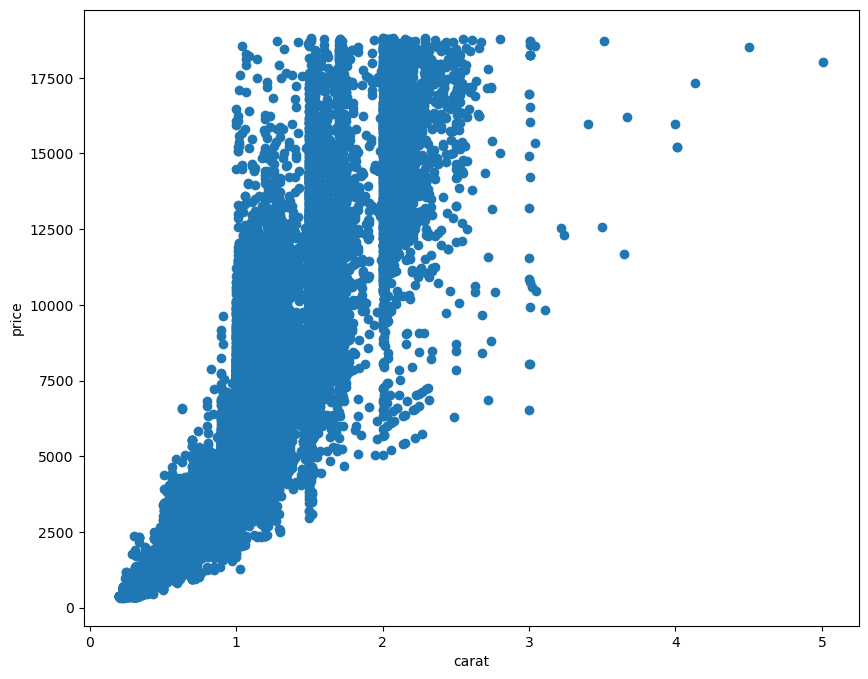

In [19]:
plt.subplots(figsize = (10, 8))
plt.scatter(data['carat'], data['price'])

plt.xlabel('carat')
plt.ylabel('price')
plt.show()

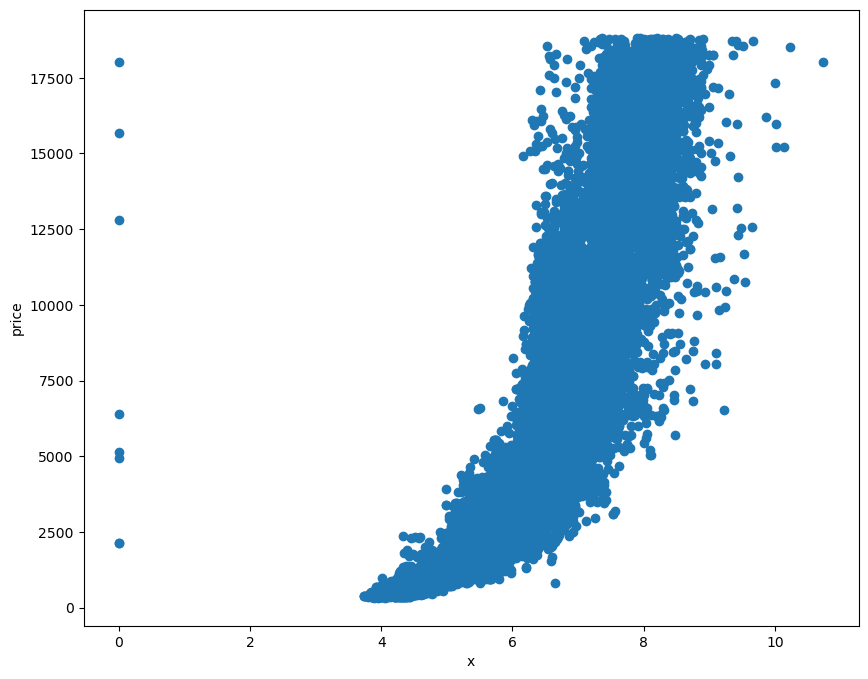

In [20]:
plt.subplots(figsize = (10, 8))
plt.scatter(data['x'], data['price'])

plt.xlabel('x')
plt.ylabel('price')
plt.show()

In [38]:
clarity_dict = {"IF" : 7, "VVS1" : 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" : 2, "SI2": 1, "I1" : 0}

data['clarity'].replace(clarity_dict, inplace=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75


In [39]:
# One hot encoding
data = pd.get_dummies(data, columns = ['cut', 'color'], dtype=int)

In [44]:
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1


In [45]:
numeric_features = ['carat', 'table', 'depth', 'x', 'y', 'z']

numeric_df = data[numeric_features]
numeric_df.describe()

,carat,table,depth,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,57.457184,61.749405,5.731157,5.734526,3.538734
std,0.474011,2.234491,1.432621,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,61.000000,4.710000,4.720000,2.910000
50%,0.700000,57.000000,61.800000,5.700000,5.710000,3.530000
75%,1.040000,59.000000,62.500000,6.540000,6.540000,4.040000
max,5.010000,95.000000,79.000000,10.740000,58.900000,31.800000


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [47]:
from sklearn.linear_model import LinearRegression

def linear_model(x_train, y_train):
    print("Linear Regression\n")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression

In [48]:
from sklearn.linear_model import Lasso

# alpha -> 0 --> lasso, normal linear regression olur yani hiç regularization yoktur.
# alpha küçük --> Hafif regularization vardır, bazı katsayılar azalır ama sıfıra gitmeyebilir.
# alpha büyük --> güçlü regularization vardır, daha fazla katsayı sıfıra çekilir, özellik seçimi yapılır.

def lasso_model(x_train, y_train):
    print("Lasso Regression\n")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    lasso_regression.fit(x_train, y_train)
    return lasso_regression

In [49]:
from sklearn.linear_model import Ridge

# L2 Regularization

def ridge_model(x_train, y_train):
    print("Ridge Regression\n")
    ridge_regression = Ridge(alpha=0.9)
    ridge_regression.fit(x_train, y_train)
    return ridge_regression

In [50]:
from sklearn.linear_model import SGDRegressor

def sgd_model(x_train, y_train):
    print("SGD Regression\n")
    sgd_regression = SGDRegressor(max_iter=2000)
    sgd_regression.fit(x_train, y_train)
    return sgd_regression

In [51]:
from sklearn.neural_network import MLPRegressor

def mlp_model(x_train, y_train):
    print("MLP Regression\n")
    mlp_regression = MLPRegressor(activation='relu', hidden_layer_sizes={12, 12, 12}, solver = 'lbfgs', verbose = True, max_iter=20000) # 3 hidden layers, 12 nöron
    mlp_regression.fit(x_train, y_train)
    return mlp_regression

In [52]:
def build_and_train_model(data, target_name, reg_fn):
    X = data.drop(target_name, axis=1)
    Y = data[target_name]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score: ", r_score)

    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))
    plt.figure(figsize=(10,8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("price of diamond")
    plt.legend()
    plt.show()

    return {'model' : model,
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test,
            'y_pred'  : y_pred,  'sample' : df_y.sample(10)            
            }

Linear Regression

Training Score :  0.9099057566776174
Testing Score:  0.912612112963329
       y_test       y_pred
32212     789  1564.311287
44041    1548  1296.587754
7617     4260  5186.797032
35908     919  1970.259781
14773    5946  5640.783274
10295    4759  5084.733677
53439    2673  3003.110886
45216    1656  1872.863904
41427    1227   864.230562
9953     4697  5630.810408


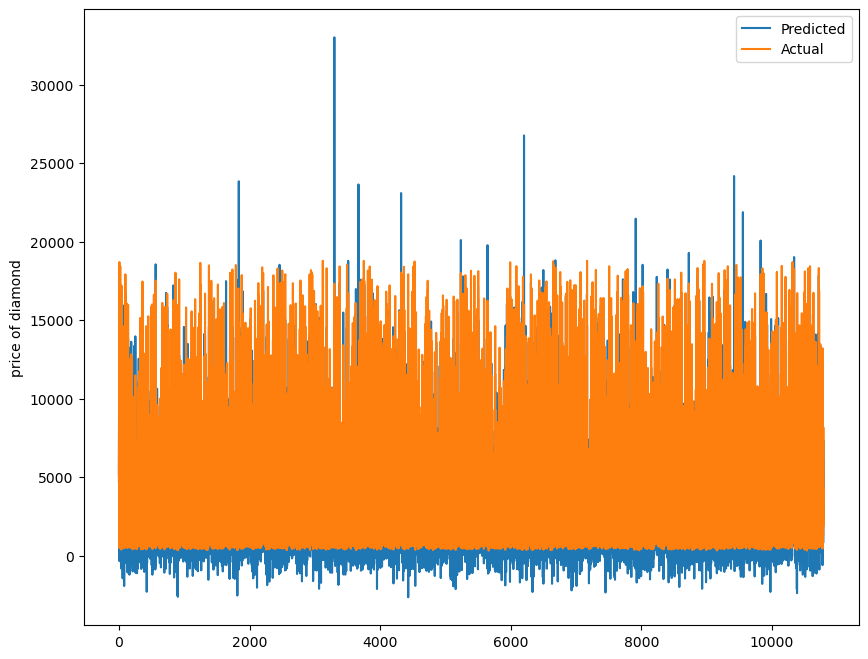

In [53]:
linear_regression = build_and_train_model(data, 'price', linear_model)

Lasso Regression

Training Score :  0.9099008418586947
Testing Score:  0.9125701890225874
       y_test       y_pred
26028     645   397.912450
53523    2689  2977.254824
27927     658   329.611968
43071    1378  1369.074811
23721     633  1269.364645
36569     945   219.127343
52049    2451  2325.923123
5360     3816  3977.159200
22387   10412  8377.783493
28227     666   658.107019


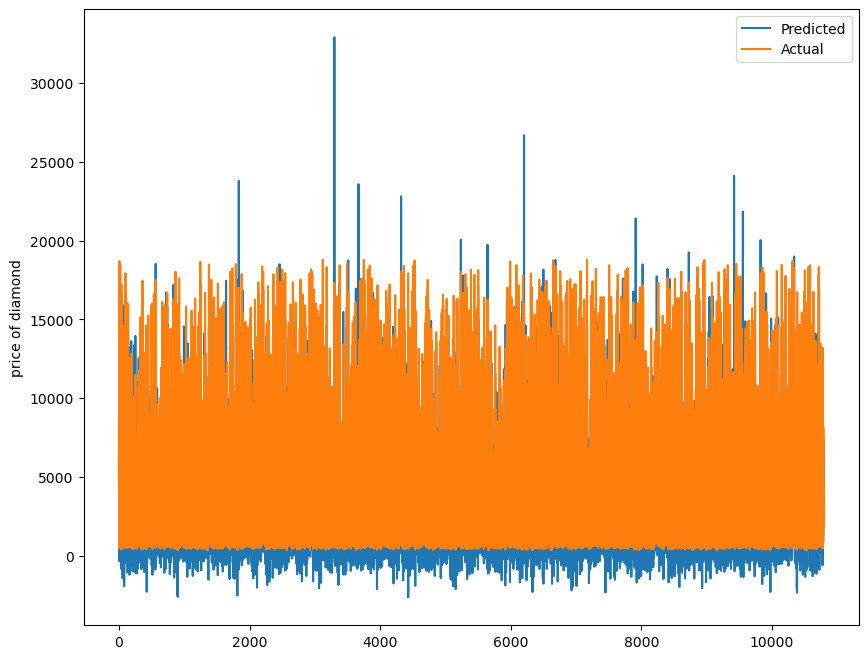

In [54]:
lasso_regression = build_and_train_model(data, 'price', lasso_model)

Ridge Regression

Training Score :  0.9099057339042314
Testing Score:  0.9126091873660964
       y_test       y_pred
28839     683   280.794578
41006    1184  1861.793183
1044     2907  3678.573321
50535    2275  2672.247718
38766    1046  1324.267783
38031    1010  1762.066507
6968     4150  5012.265109
3880     3484  4232.621560
1650     3018  3767.765909
39075    1059   784.663832


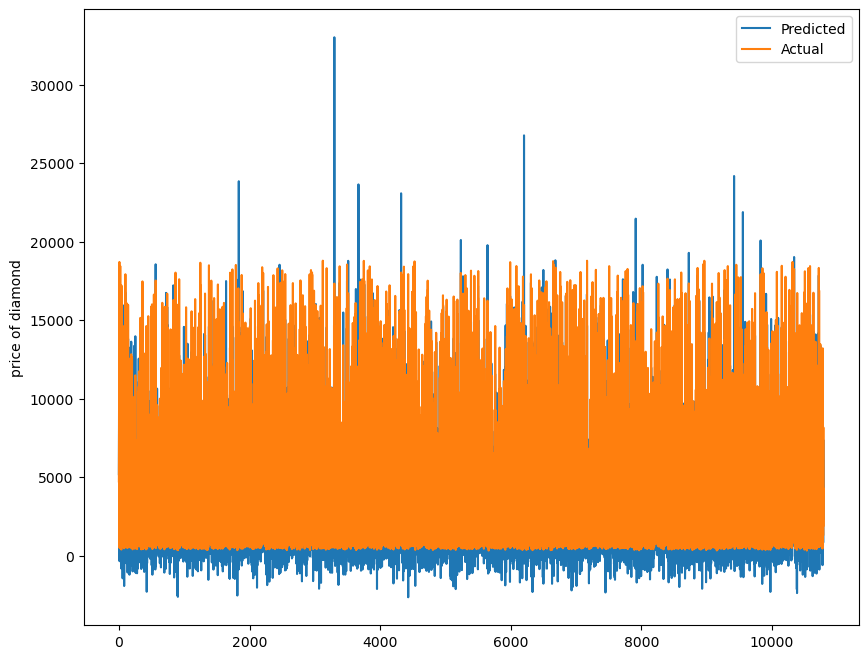

In [55]:
ridge_regression = build_and_train_model(data, 'price', ridge_model)

SGD Regression

Training Score :  0.9097051457199762
Testing Score:  0.9124804861109139
       y_test        y_pred
168      2772   3776.050047
19393    8058   9227.197166
37595     485    640.271184
22655   10702  10284.364370
39577    1081   1533.928865
35998     921   1297.657612
43616     507   -274.704653
44111    1558   1548.884509
6928     4139   5932.288760
3372      407   -983.337998


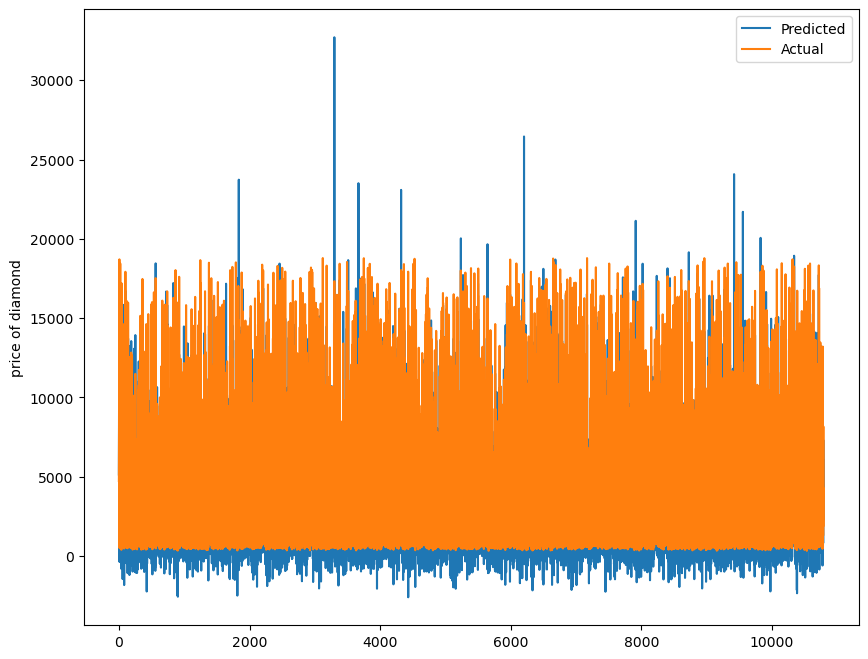

In [56]:
sgd_regression = build_and_train_model(data, 'price', sgd_model)

MLP Regression

Training Score :  0.9770773703277329
Testing Score:  0.9750487084882892
       y_test       y_pred
32298     454   363.448185
20300    8714  9127.637090
4139     3544  3951.463241
31616     372   473.080420
17080    6810  7524.648877
48446    1974  1551.951822
21296    9450  8759.861567
44016    1546  1417.992017
16150    6455  6232.160918
15040     605   649.876267


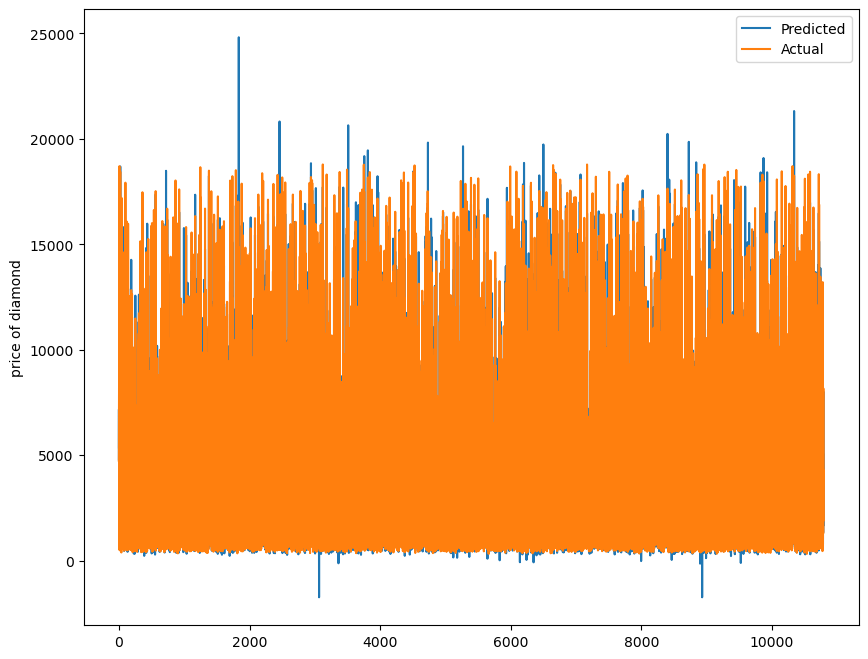

In [57]:
mlp_regression = build_and_train_model(data, 'price', mlp_model)